In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [158]:
USER_START=1
USER_END=11

In [159]:
sns.set_theme(
    context="paper",
#     style="white",
#     palette=sns.color_palette("Set1", 9, 0.9),
)
palette = sns.color_palette("BrBG", 6, 1)

In [160]:
dirpath = "/home/thl/edge-cloud-continuum-openfaas/experiment/trigger/result"
# target_col_name = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
target_col_name = ["Total Average Response Time"]
user_count_list = [i for i in range(USER_START, USER_END + 1)]
df_plot_resptime = pd.DataFrame(columns = ["Response Time", "User Count"])
arch_list = ["Centralized", "Decentralized"]
# arch_list = ["Centralized", "Federated", "Decentralized"]
metric = "cpu"
for user_cnt in user_count_list:
    for arch in arch_list:
        df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_stats_history.csv")
        df = df[target_col_name].iloc[[-1],:]
        df.index = ["Response Time"]
        df = df.transpose().reset_index(drop = True)
        df["User Count"] = user_cnt
        df["Architecture"] = arch
        df_plot_resptime = pd.concat((df_plot_resptime, df))

/tmp/ipykernel_5090/1972378745.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plot_resptime = pd.concat((df_plot_resptime, df))


In [161]:
df_plot_resptime.head(10)

,Response Time,User Count,Architecture
0,431.528514,1,Centralized
0,944.651089,1,Decentralized
0,444.880990,2,Centralized
0,1103.181805,2,Decentralized
0,459.990855,3,Centralized
0,1342.039799,3,Decentralized
0,450.387479,4,Centralized
0,1472.423395,4,Decentralized
0,454.441737,5,Centralized
0,1388.891611,5,Decentralized


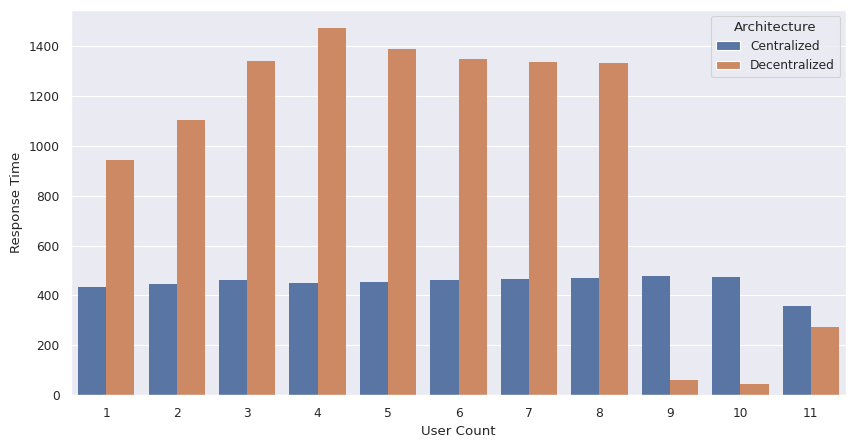

In [162]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_plot_resptime, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    # errorbar="sd",
    linestyle='', dodge=.5, capsize=.1)
plt.show()

<Axes: xlabel='User Count', ylabel='Response Time'>

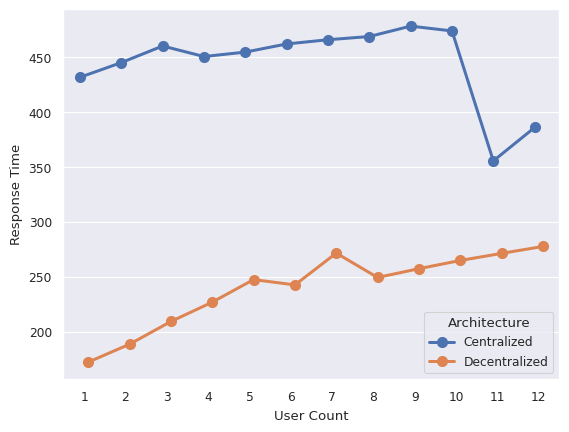

In [156]:
sns.pointplot(
    data=df_plot_resptime, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    linestyle='-', dodge=.2, capsize=.1,
    marker=".", markersize=10, markeredgewidth=3)